<a href="https://colab.research.google.com/github/MohammadQasim03/Intelligence-Systems-C0559/blob/main/4_Decision_Tree_Iris_APLHA_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

%pylab inline
%matplotlib inline


Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Suppressing warnings to avoid cluttering the output
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the iris dataset
iris = datasets.load_iris()

# Create a DataFrame from the iris dataset
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])

# Display the first few rows of the DataFrame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
# Count the occurrences of each target value in the DataFrame
df["target"].value_counts()

target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

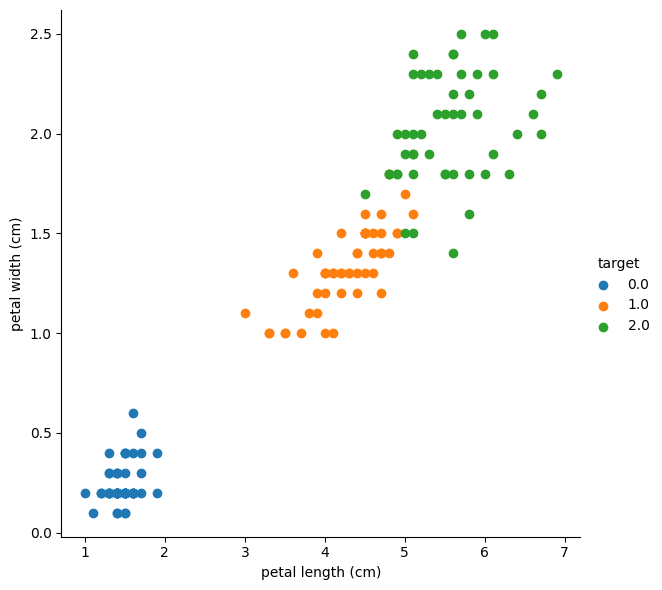

In [ ]:
# Create a FacetGrid using seaborn, specifying the DataFrame and the column to hue by
# Height parameter determines the size of the FacetGrid
# Use plt.scatter to create a scatter plot, mapping "petal length (cm)" to the x-axis and "petal width (cm)" to the y-axis
# Hue parameter colors the data points based on the "target" column
# Add a legend to the plot to identify the different classes
sns.FacetGrid(df, hue="target", height=6).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()

# ***Apply on Iris Dataset***

In [ ]:
# fit a CART model to the data
#model = DecisionTreeClassifier()
model = DecisionTreeClassifier(criterion="entropy",max_depth=2)

model.fit(iris.data, iris.target)
print(model)

DecisionTreeClassifier(criterion='entropy', max_depth=2)


In [ ]:
# Calculate the accuracy of the trained model on the same dataset it was trained on
model.score(iris.data, iris.target)

0.96

# ***Make predictions***

In [ ]:
# Assign the true target values from the iris dataset to the variable 'expected'
expected = iris.target

# Use the trained model to predict the target values based on the input features (iris data)
predicted = model.predict(iris.data)

# ***Summarize the fit of the model***

In [ ]:
# Print a classification report, including precision, recall, F1-score, and support, based on the comparison between expected and predicted values
print(metrics.classification_report(expected, predicted))

# Print the confusion matrix, showing the counts of true positive, false positive, true negative, and false negative predictions
print(metrics.confusion_matrix(expected, predicted))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.91      0.98      0.94        50
           2       0.98      0.90      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]


# ***Tunning parameters***

In [ ]:
def Decision_Tree(Type, Depth):
    # import some data to play with
    iris = datasets.load_iris()

    # Extract only the first two features for visualization
    X = iris.data[:, :2]
    Y = iris.target

    # step size in the mesh
    h = .02

    # Create an instance of DecisionTreeClassifier and fit the data
    model = DecisionTreeClassifier(criterion=Type, max_depth=Depth)

    model.fit(X, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

    # Fit the model to the full iris dataset
    model.fit(iris.data, iris.target)
    expected = iris.target
    predicted = model.predict(iris.data)

    # Print classification report
    print(metrics.classification_report(expected, predicted))

    # Print confusion matrix
    print(metrics.confusion_matrix(expected, predicted))

In [ ]:
# Import widgets from IPython.html
from IPython.html import widgets

# Import interact function from IPython.html.widgets
from IPython.html.widgets import interact

# Import display function from IPython.display
from IPython.display import display

In [ ]:
# Create an interactive widget 'i' using the interact function, allowing users to interactively explore the Decision_Tree function
# Users can choose between 'gini' or 'entropy' for the criterion and set the maximum depth within the range of 1 to 10
i = interact(Decision_Tree, Type=['gini','entropy'], Depth=(1,10))

interactive(children=(Dropdown(description='Type', options=('gini', 'entropy'), value='gini'), IntSlider(value…